In [1]:
import torch

In [2]:
a = torch.arange(128)
a = a.view(2, 4, 16)
a

tensor([[[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
           14,  15],
         [ 16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
           30,  31],
         [ 32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
           46,  47],
         [ 48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
           62,  63]],

        [[ 64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
           78,  79],
         [ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
           94,  95],
         [ 96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
          110, 111],
         [112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
          126, 127]]])

In [3]:
b = a.reshape(2, 4, 8, 2).transpose(1, 2)
b

tensor([[[[  0,   1],
          [ 16,  17],
          [ 32,  33],
          [ 48,  49]],

         [[  2,   3],
          [ 18,  19],
          [ 34,  35],
          [ 50,  51]],

         [[  4,   5],
          [ 20,  21],
          [ 36,  37],
          [ 52,  53]],

         [[  6,   7],
          [ 22,  23],
          [ 38,  39],
          [ 54,  55]],

         [[  8,   9],
          [ 24,  25],
          [ 40,  41],
          [ 56,  57]],

         [[ 10,  11],
          [ 26,  27],
          [ 42,  43],
          [ 58,  59]],

         [[ 12,  13],
          [ 28,  29],
          [ 44,  45],
          [ 60,  61]],

         [[ 14,  15],
          [ 30,  31],
          [ 46,  47],
          [ 62,  63]]],


        [[[ 64,  65],
          [ 80,  81],
          [ 96,  97],
          [112, 113]],

         [[ 66,  67],
          [ 82,  83],
          [ 98,  99],
          [114, 115]],

         [[ 68,  69],
          [ 84,  85],
          [100, 101],
          [116, 117]],

        

In [4]:
from Transformer.transformer import TransformerEncoder

t = TransformerEncoder(6, 512, 8, 1024)
x = torch.rand((128, 32, 512))

y = t(x)

In [1]:
import torch
from Transformer.transformer import GITDecoder

d = GITDecoder(
    num_layers=2,
    d_model=512,
    num_heads=8,
    d_ffn=1024,
    vocab_size=20,
    max_seq_len=32
)

q = torch.arange(12).unsqueeze(0)
s = torch.arange(12).unsqueeze(0) + 1
token = torch.cat((q, s))
visual = torch.rand((2, 5, 512))

d(token, visual).shape

torch.Size([2, 17, 20])

In [2]:
import torch

r = torch.arange(9 * 9).view((9, 9))
g = r + 100
b = r + 200

img = torch.cat((r.unsqueeze(0), g.unsqueeze(0), b.unsqueeze(0))).unsqueeze(0)
img = torch.cat((img, img + 1000))
hw = 81
p = 3
n = hw/p**2

img.unfold(2, 3, 3).unfold(3, 3, 3).reshape(2, 3, 9, 3 * 3).shape #permute(0, 2, 3, 1).shape

torch.Size([2, 3, 9, 9])

/home/henri/Dokumente/OneDrive/BA/code/.venv/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:1087: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  _warn_get_lr_called_within_step(self)
/home/henri/Dokumente/OneDrive/BA/code/.venv/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


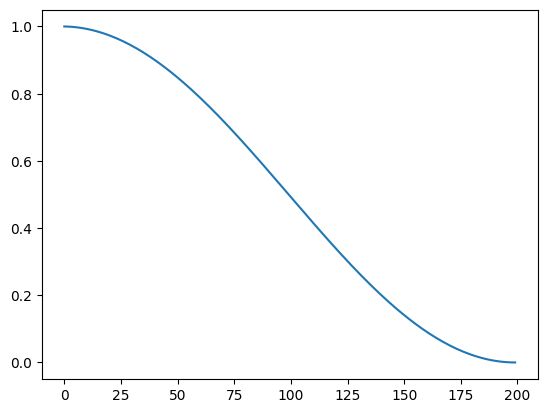

In [1]:
from torch import optim, nn
import matplotlib.pyplot as plt

o = optim.Adam(nn.Linear(10, 10).parameters(), 1)
s = optim.lr_scheduler.CosineAnnealingLR(o, 200)

lrs = []
for _ in range(200):
    lrs.append(s.get_last_lr())
    s.step()
    
plt.plot(lrs)